# PCA Implementation
PCA is a technique to reduce the dimensionality of data to improve the efficiency of a model, or to visualize data. Here, we will reduce the number of dimensions in order to visualize the data, then review the impacts.

In [3]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import pandas as pd

# Load the dataset
data_df = pd.read_csv("Real estate.csv")
print(data_df.shape)
# Prepare the data
data_df = data_df.drop(['No'], axis=1)
scaler = StandardScaler()

for feature in data_df.columns[:-1]:
    data_df[[feature]] = scaler.fit_transform(data_df[[feature]])

X = data_df[data_df.columns[:-1]]
y = data_df[data_df.columns[-1]]


# reduce the PCA to visualize the components
pca = PCA(n_components = 1)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



(414, 8)


The data has now been prepared for use and reduce for visualization. Below, we will review the impacts of reducing the data

KNeighborsRegressor(n_neighbors=4) PCA:  1  MSE:  72.6
LinearRegression() PCA:  1  MSE:  78.03
DecisionTreeRegressor(max_depth=3) PCA:  1  MSE:  69.09
SVR() PCA:  1  MSE:  70.91
KNeighborsRegressor(n_neighbors=4) PCA:  2  MSE:  87.09
LinearRegression() PCA:  2  MSE:  76.38
DecisionTreeRegressor(max_depth=3) PCA:  2  MSE:  69.48
SVR() PCA:  2  MSE:  67.95
KNeighborsRegressor(n_neighbors=4) PCA:  3  MSE:  56.54
LinearRegression() PCA:  3  MSE:  67.15
DecisionTreeRegressor(max_depth=3) PCA:  3  MSE:  75.26
SVR() PCA:  3  MSE:  63.0
KNeighborsRegressor(n_neighbors=4) PCA:  4  MSE:  54.04
LinearRegression() PCA:  4  MSE:  65.04
DecisionTreeRegressor(max_depth=3) PCA:  4  MSE:  72.74
SVR() PCA:  4  MSE:  59.31
KNeighborsRegressor(n_neighbors=4) PCA:  5  MSE:  55.28
LinearRegression() PCA:  5  MSE:  64.95
DecisionTreeRegressor(max_depth=3) PCA:  5  MSE:  70.32
SVR() PCA:  5  MSE:  62.07
KNeighborsRegressor(n_neighbors=4) PCA:  6  MSE:  60.09
LinearRegression() PCA:  6  MSE:  66.67
DecisionTre

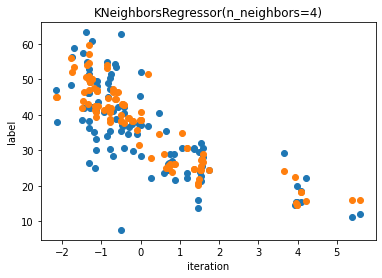

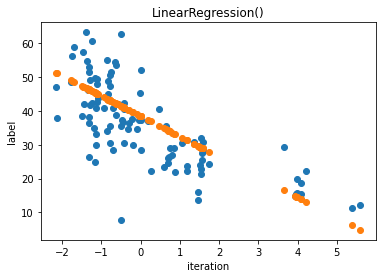

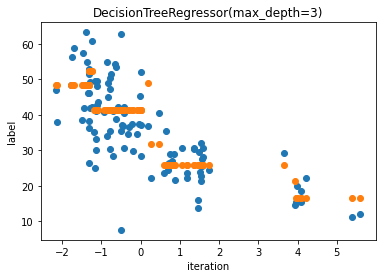

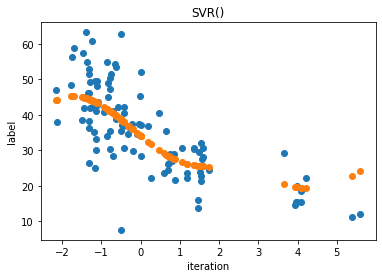

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load models
knn = KNeighborsRegressor(n_neighbors=4)
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=3)
svm = SVR()

models = [knn,lr,dt,svm]

# Visualize each model
for i in range(1, data_df.shape[1]):
    X = data_df[data_df.columns[:-1]]
    y = data_df[data_df.columns[-1]]
    pca = PCA(n_components = i)
    X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    for model in models:
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        print(model, "PCA: ", i," MSE: ", np.round(mean_squared_error(y_test, y_hat),2))
        
        if i == 1:
            fig,ax = plt.subplots(1,1)
            ax.scatter(X_test, y_test, label = "predicted")
            ax.scatter(X_test,y_hat, label = 'actual')

            ax.set_title(model)
            ax.set_xlabel('iteration')
            ax.set_ylabel('label')




We can now actually visualize how each model predicts the data. The MSE and MAE were impacted by the data transformation, however it is close enough to the original values that it is difficult to determine if this is due to the random impacts of selecting the training and testing data, or solely due to the PCA. We reduced the dimensionality of our data from 7 features to 1 and maintained the integrity of our models.